<a href="https://colab.research.google.com/github/retuyu88/digitalentkominfo/blob/master/Copy_of_%5B27_2%5D_CNN_vs_ANN_CIFAR_10_ADF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://i.imgur.com/UjutVJd.jpg" align = "center">

---
# Dataset CIFAR-10


Jangan lupa, pastikan Colab ini berjalan dengan GPU


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=7)

---
## Load Dataset CIFAR-10





In [2]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)
print('X_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

170500096/170498071 [==============================] - 3s 0us/step
X_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)
X_test.shape  = (10000, 32, 32, 3)
y_test.shape  = (10000, 1)


---
## Visualisasi Data CIFAR-10


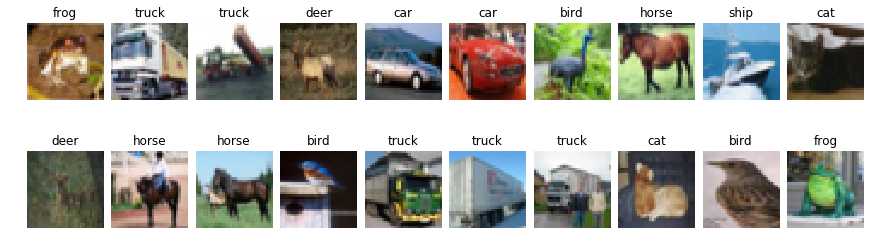

In [3]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10])
        ax[j,i].set_title(classes[y_train[i+j*10,0]])
        ax[j,i].axis('off')
plt.show()

---
## Bagi Data Validasi
Ambil 10,000 data terakhir dari data latih menjadi data Validasi di dalam matrix `X_val` dan `y_val`

In [4]:
X_val = X_train[-10000:,:]
y_val = y_train[-10000:]

X_train = X_train[:-10000, :]
y_train = y_train[:-10000]

print('X_val.shape   =',X_val.shape)
print('y_val.shape   =',y_val.shape)
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

X_val.shape   = (10000, 32, 32, 3)
y_val.shape   = (10000, 1)
X_train.shape = (40000, 32, 32, 3)
y_train.shape = (40000, 1)


---
## Normalizing Data

In [5]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

mean_image = np.mean(X_train, axis = 0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

print('X_train.shape =',X_train.shape)
print('X_val.shape   =',X_val.shape)
print('X_test.shape  =',X_test.shape)


X_train.shape = (40000, 32, 32, 3)
X_val.shape   = (10000, 32, 32, 3)
X_test.shape  = (10000, 32, 32, 3)


---
## One Hot Matrix



 Ubah vektor target `y_train`, `y_val`, dan `y_test` menjadi bentuk One-Hot Matrix

In [6]:
from tensorflow.keras.utils import to_categorical

y_train_hot = to_categorical(y_train.ravel(), 10)
y_val_hot = to_categorical(y_val.ravel(), 10)
y_test_hot = to_categorical(y_test.ravel(), 10)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (40000, 10)
y_val_hot.shape   = (10000, 10)
y_test_hot.shape  = (10000, 10)


---

# Three-Layer Neural Network

Berikutnya, mari kita bangun Jaringan Saraf Tiruan sedalam 3 layer untuk mengklasifikasikan dataset FMNIST ini


---
## Import Modul



In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

num_data    = X_train.shape[0]
X_dim       = X_train.shape[1]
num_classes = y_train_hot.shape[1]

---
## Model Neural Network


In [8]:
# create model compact sequential

model_ann = Sequential([
  Flatten(input_shape=(32,32,3)),
  Dense(500, activation="relu"),
  Dense(200, activation="relu"),
  Dense(num_classes, activation="softmax")
])

model_ann.summary()

W0806 02:14:25.792762 139961398556544 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1536500   
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 1,638,710
Trainable params: 1,638,710
Non-trainable params: 0
_________________________________________________________________


---
## Melatih Model

In [9]:
# Compile model
model_ann.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


num_epochs = 15
batch_size = 1000

hist_ann = model_ann.fit(X_train, y_train_hot, 
          validation_data=(X_val, y_val_hot),
          epochs=num_epochs, batch_size=batch_size, 
          verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 - 1s - loss: 61.9885 - acc: 0.2650 - val_loss: 19.5077 - val_acc: 0.3032
Epoch 2/15
40000/40000 - 1s - loss: 14.8004 - acc: 0.3178 - val_loss: 13.4037 - val_acc: 0.2932
Epoch 3/15
40000/40000 - 1s - loss: 6.4376 - acc: 0.2830 - val_loss: 3.4161 - val_acc: 0.1869
Epoch 4/15
40000/40000 - 1s - loss: 2.3924 - acc: 0.1743 - val_loss: 2.4481 - val_acc: 0.1425
Epoch 5/15
40000/40000 - 1s - loss: 2.1678 - acc: 0.1841 - val_loss: 2.4392 - val_acc: 0.1530
Epoch 6/15
40000/40000 - 1s - loss: 2.0802 - acc: 0.2152 - val_loss: 2.4377 - val_acc: 0.1821
Epoch 7/15
40000/40000 - 1s - loss: 2.0116 - acc: 0.2539 - val_loss: 2.4452 - val_acc: 0.2224
Epoch 8/15
40000/40000 - 1s - loss: 1.9492 - acc: 0.2786 - val_loss: 2.4354 - val_acc: 0.2347
Epoch 9/15
40000/40000 - 1s - loss: 1.8961 - acc: 0.2981 - val_loss: 2.4260 - val_acc: 0.2357
Epoch 10/15
40000/40000 - 1s - loss: 1.8425 - acc: 0.3127 - val_loss: 2.4388 - val_acc: 0.2580
Epoch

---
## Evaluasi Model


In [10]:
scores_ann = model_ann.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores_ann[1]*100))

10000/10000 [==============================] - 1s 75us/sample - loss: 2.4279 - acc: 0.2956

Model Accuracy: 29.56%


---

# Three-Layer Convolutional Neural Network
Sebagai perbandingan, mari kita bangun Convolutional Neural Network yang juga hanya 3 layer


---
## Import Modul



In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

---
## Model Neural Network


In [14]:
# create model compact sequential

model_cnn = Sequential([
  Conv2D(64,(5,5),input_shape=(32,32,3), padding='same', activation="relu"),
  MaxPooling2D(),
  Conv2D(32,(5,5), padding='same', activation="relu"),
  MaxPooling2D(),
  Flatten(),
  Dense(100, activation="relu"),
  Dense(num_classes, activation="softmax")
])

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        51232     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               204900    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

---
## Melatih Model

In [15]:
# Compile model
model_cnn.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


num_epochs = 15
batch_size = 1000

hist_cnn = model_cnn.fit(X_train, y_train_hot, 
          validation_data=(X_val, y_val_hot),
          epochs=num_epochs, batch_size=batch_size, 
          verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 - 5s - loss: 5.0846 - acc: 0.1310 - val_loss: 2.2433 - val_acc: 0.1522
Epoch 2/15
40000/40000 - 2s - loss: 2.1775 - acc: 0.1720 - val_loss: 2.1111 - val_acc: 0.2078
Epoch 3/15
40000/40000 - 2s - loss: 2.0523 - acc: 0.2489 - val_loss: 2.0057 - val_acc: 0.2752
Epoch 4/15
40000/40000 - 2s - loss: 1.9366 - acc: 0.3042 - val_loss: 1.9211 - val_acc: 0.3221
Epoch 5/15
40000/40000 - 2s - loss: 1.8315 - acc: 0.3484 - val_loss: 1.7876 - val_acc: 0.3750
Epoch 6/15
40000/40000 - 2s - loss: 1.7002 - acc: 0.4006 - val_loss: 1.6776 - val_acc: 0.4173
Epoch 7/15
40000/40000 - 2s - loss: 1.5967 - acc: 0.4342 - val_loss: 1.6214 - val_acc: 0.4426
Epoch 8/15
40000/40000 - 2s - loss: 1.5102 - acc: 0.4690 - val_loss: 1.5430 - val_acc: 0.4644
Epoch 9/15
40000/40000 - 2s - loss: 1.4427 - acc: 0.4960 - val_loss: 1.5299 - val_acc: 0.4688
Epoch 10/15
40000/40000 - 2s - loss: 1.4059 - acc: 0.5069 - val_loss: 1.4690 - val_acc: 0.4954
Epoch 11/

---
## Evaluasi Model


In [16]:
scores_cnn = model_cnn.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores_cnn[1]*100))

10000/10000 [==============================] - 1s 103us/sample - loss: 1.3045 - acc: 0.5515

Model Accuracy: 55.15%


---
# Perbandingan ANN dan CNN

Sekarang, mari kita investigasi performa ANN dan CNN

---
## Jumlah Parameter

In [17]:
print('model ANN:')
model_ann.summary()

print('\n\nmodel CNN:')
model_cnn.summary()

model ANN:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1536500   
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 1,638,710
Trainable params: 1,638,710
Non-trainable params: 0
_________________________________________________________________


model CNN:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        4864      


In [18]:
print('total parameter ANN:', f'{ model_ann.count_params():,}')
print('total parameter CNN:', f'{ model_cnn.count_params():,}')

total parameter ANN: 1,638,710
total parameter CNN: 262,006


---
## Grafik Hasil Pelatihan

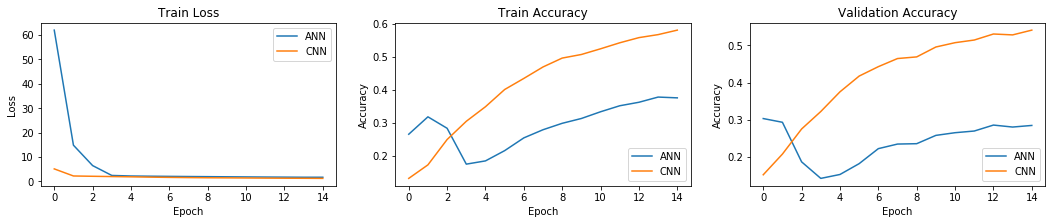

In [19]:
fig, ax = plt.subplots(1,3,figsize=(18,3))

ax[0].plot(hist_ann.history['loss'])
ax[0].plot(hist_cnn.history['loss'])
ax[0].set_title('Train Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['ANN', 'CNN'], loc='upper right')

ax[1].plot(hist_ann.history['acc'])
ax[1].plot(hist_cnn.history['acc'])
ax[1].set_title('Train Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
# ax[1].set_ylim(bottom=.7)
ax[1].legend(['ANN', 'CNN'], loc='lower right')

ax[2].plot(hist_ann.history['val_acc'])
ax[2].plot(hist_cnn.history['val_acc'])
ax[2].set_title('Validation Accuracy')
ax[2].set_ylabel('Accuracy')
ax[2].set_xlabel('Epoch')
# ax[2].set_ylim(bottom=.7)
ax[2].legend(['ANN', 'CNN'], loc='lower right')
plt.show()

---
## Akurasi Data Uji

In [20]:
print("Akurasi ANN: %.2f%%" % (scores_ann[1]*100))
print("Akurasi CNN: %.2f%%" % (scores_cnn[1]*100))

Akurasi ANN: 29.56%
Akurasi CNN: 55.15%


---
## Pengecekan Overfitting

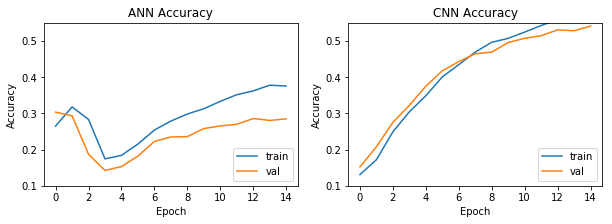

In [21]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

ax[0].plot(hist_ann.history['acc'])
ax[0].plot(hist_ann.history['val_acc'])
ax[0].set_title('ANN Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylim(bottom=.1)
ax[0].set_ylim(top=.55)
ax[0].legend(['train', 'val'], loc='lower right')

ax[1].plot(hist_cnn.history['acc'])
ax[1].plot(hist_cnn.history['val_acc'])
ax[1].set_title('CNN Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylim(bottom=.1)
ax[1].set_ylim(top=.55)
ax[1].legend(['train', 'val'], loc='lower right')
plt.show()

Makin besar gap antara akurasi training dan validasi menandakan makin rentan terhadap overfitting

---
# Kesimpulan
* CNN memiliki parameter yang jauh lebih sedikit dari ANN, namun memiliki akurasi akhir yang lebih baik
* CNN Lebih tangguh terhadap *Overfitting*

<p>Copyright &copy; 2019 <a href=https://www.linkedin.com/in/andityaarifianto/>ADF</a> </p>